In [3]:
from utilities.simulation import model, entity_df
from openfisca_uk.reforms.basic_income.simulation_4 import simulation_4
import numpy as np
from rdbl import gbp
import microdf as mdf
from matplotlib import pyplot as plt
import os

mdf.set_plot_style()
if "inputs" not in os.listdir("."):
    os.chdir("..")

baseline = model()
reformed = model(simulation_4)
period = "2020-09-10"

poverty_in_baseline = baseline.calculate("family_total_income", period) < 340
family_weights = baseline.calculate("family_weight", period)
adult_weights = baseline.calculate("adult_weight", period)
net_gain = reformed.calculate("family_net_income", period) - baseline.calculate("family_net_income", period)
total_net_cost = (net_gain * family_weights).sum() * 52

net_among_poverty = np.average(net_gain, weights=poverty_in_baseline*family_weights)
net_among_all = np.average(net_gain, weights=family_weights)

print(f"Mean family weekly net income gain among families in relative poverty in baseline: {gbp(net_among_poverty)}.")
print(f"Mean family weekly net income gain among all families in baseline: {gbp(net_among_all)}.")

print(f"Net cost of reform: {gbp(total_net_cost)}")

ubi_cost = (reformed.calculate("family_basic_income", period) * family_weights).sum() * 52
print(f"Gross UBI cost: {gbp(ubi_cost)}")

diff_vars_adult = [
    "income_tax",
    "NI",
    "pension_income",
]

diff_vars_family = [
    "child_benefit",
    "working_tax_credit",
    "child_tax_credit",
    "contributory_JSA",
    "income_JSA",
    "income_support"
]

print("Total amounts changed per year:")

for var in diff_vars_adult:
    diff = ((reformed.calculate(var, period) - baseline.calculate(var, period)) * adult_weights).sum() * 52
    print(f"{var}: {gbp(diff)}")

for var in diff_vars_family:
    diff = ((reformed.calculate(var, period) - baseline.calculate(var, period)) * family_weights).sum() * 52
    print(f"{var}: {gbp(diff)}")

family_baseline_df = entity_df(baseline)
family_reform_df = entity_df(reformed)

adult_baseline_df = entity_df(baseline, entity="person")
adult_reform_df = entity_df(reformed, entity="person")

Mean family weekly net income gain among families in relative poverty in baseline: £99.
Mean family weekly net income gain among all families in baseline: £2.54.
Net cost of reform: £4.6bn
Gross UBI cost: £390bn
Total amounts changed per year:
income_tax: £320bn
NI: £70bn
pension_income: £0
child_benefit: £0
working_tax_credit: £0
child_tax_credit: £0
contributory_JSA: £0
income_JSA: £8.6m
income_support: £18m


In [4]:
baseline_gini = mdf.gini(family_baseline_df, "family_net_income", w="per_capita_weight")
reform_gini = mdf.gini(family_reform_df, "family_net_income", w="per_capita_weight")
reduction = (baseline_gini - reform_gini) / baseline_gini
print(f"Gini reduction: {reduction * 100}%")

Gini reduction: 19.052095268361175%


## Income decile changes
### Change in family net income per week

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


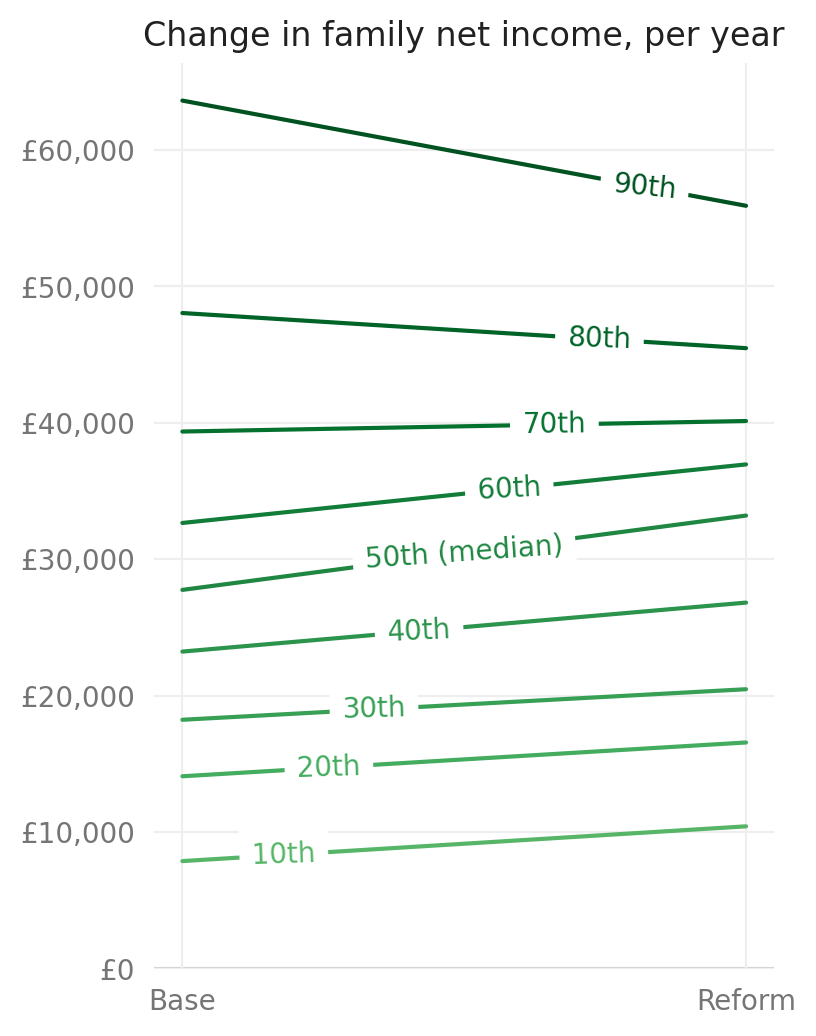

In [5]:
family_baseline_df["family_net_income"] *= 52
family_reform_df["family_net_income"] *= 52
ax = mdf.quantile_chg_plot(family_baseline_df, family_reform_df, 'family_net_income', 'family_net_income',
                           'per_capita_weight', 'per_capita_weight', title="Change in family net income, per year", currency="GBP")
plt.show()

### Change in family post-tax income per week

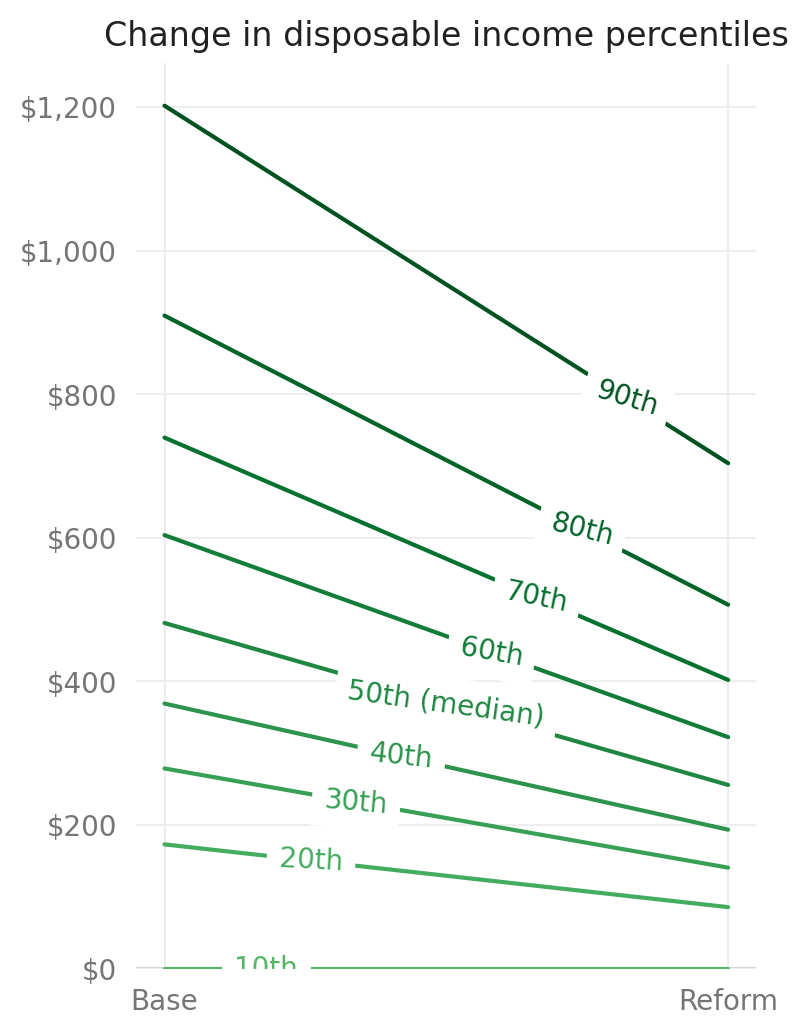

In [6]:
ax = mdf.quantile_chg_plot(family_baseline_df, family_reform_df, 'family_post_tax_income', 'family_post_tax_income',
                           'per_capita_weight', 'per_capita_weight')
plt.show()

### Change in individual income tax liability per week

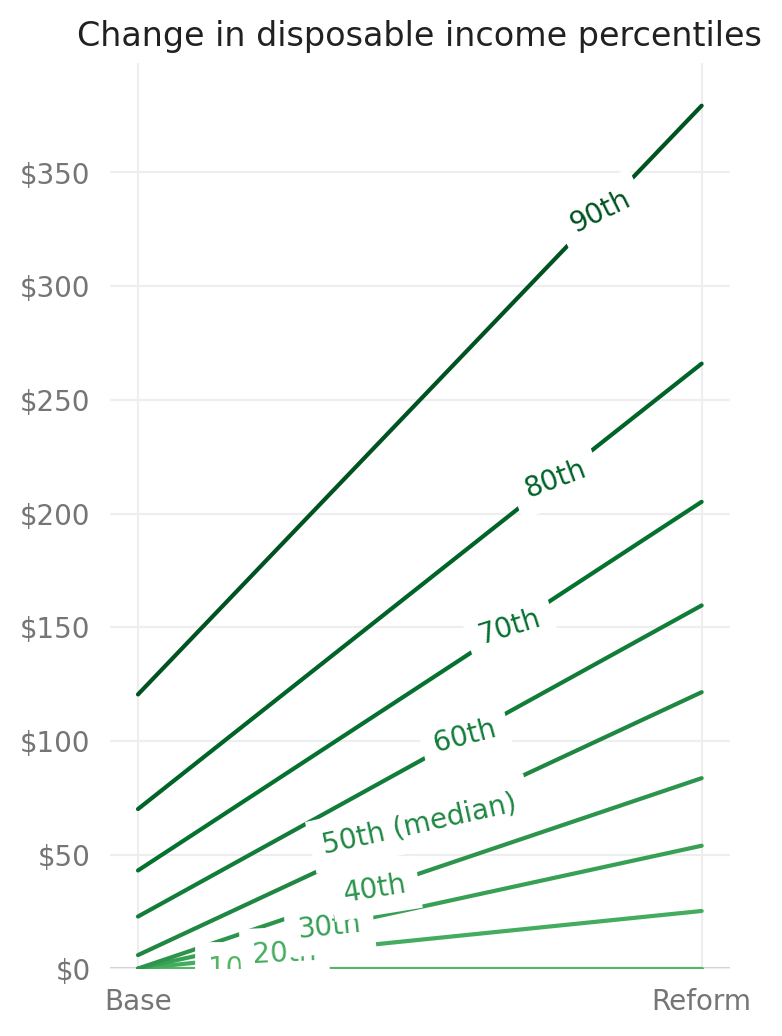

In [7]:
ax = mdf.quantile_chg_plot(adult_baseline_df, adult_reform_df, 'income_tax', 'income_tax',
                           'adult_weight', 'adult_weight')
plt.show()

### Change in National Insurance liability per week

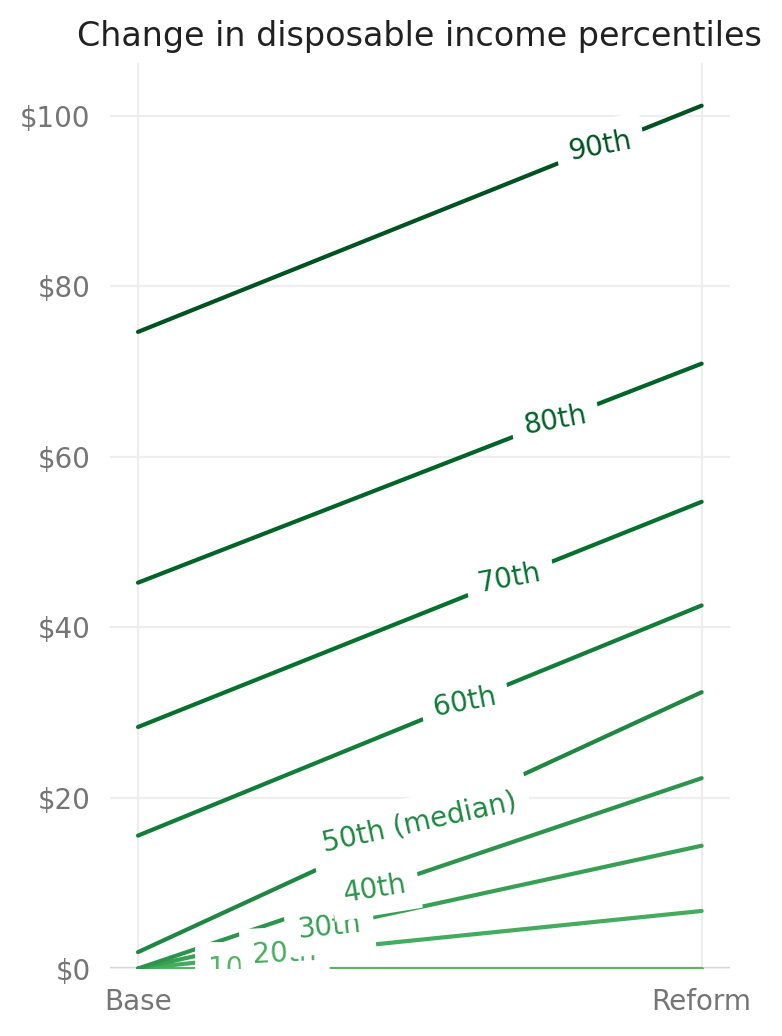

In [8]:
ax = mdf.quantile_chg_plot(adult_baseline_df, adult_reform_df, 'NI', 'NI',
                           'adult_weight', 'adult_weight')
plt.show()